# 03. Convolution Neural Networks and Computer Vision with TensorFlow

Going to cover:
* Getting a dataset to work
* Architecture of convolution neural network
* A quick end-to-end example
* Steps in modelling for binary image classification with CNNs
    * Becoming one with the data
    * Preparing data for modelling
    * Creating a CNN model
    * Fitting a model
    * Evaluating a model
    * Improving a model
    * Making a prdiction with trained model
* Steps in modelling for multi-class image clasfication with CNNs
* Same as above (With different dataset)

## Get the data

In [1]:
import os

# pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'data'.
There are 2 directories and 0 images in 'data\test'.
There are 0 directories and 250 images in 'data\test\pizza'.
There are 0 directories and 250 images in 'data\test\steak'.
There are 2 directories and 0 images in 'data\train'.
There are 0 directories and 750 images in 'data\train\pizza'.
There are 0 directories and 750 images in 'data\train\steak'.


In [2]:
# Check the number of images in each directory
for dirpath, dirnames, filenames in os.walk("data"):
    print(f"{dirpath} contains {len(filenames)} images.")

data contains 1 images.
data\test contains 0 images.
data\test\pizza contains 250 images.
data\test\steak contains 250 images.
data\train contains 0 images.
data\train\pizza contains 750 images.
data\train\steak contains 750 images.


In [3]:
# Get the classs names
import pathlib
import numpy as np
data_dir = pathlib.Path("data/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [4]:
# Visualize the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder = target_dir + target_class

    # Get a random image path
    random_img = random.sample(os.listdir(target_folder), 1)

    # Read the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)


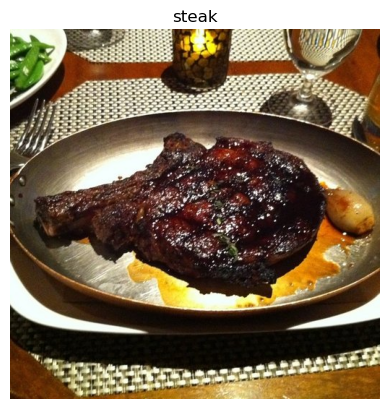

In [5]:
# View a random image from the training dataset
img = view_random_image(target_dir="data/train/", target_class="steak")

In [6]:
# View the img
img

array([[[251, 255, 231],
        [251, 255, 233],
        [245, 253, 230],
        ...,
        [114,  45,   3],
        [112,  43,   1],
        [120,  53,   8]],

       [[242, 248, 222],
        [246, 255, 228],
        [247, 255, 232],
        ...,
        [116,  47,   6],
        [109,  42,   0],
        [114,  47,   2]],

       [[238, 247, 218],
        [246, 255, 227],
        [245, 255, 230],
        ...,
        [117,  48,   7],
        [109,  42,   0],
        [107,  43,   0]],

       ...,

       [[ 51,  25,  10],
        [ 49,  23,   6],
        [ 47,  21,   4],
        ...,
        [114,  64,   3],
        [121,  69,   9],
        [132,  80,  20]],

       [[ 47,  24,   6],
        [ 45,  23,   2],
        [ 45,  23,   2],
        ...,
        [117,  66,   3],
        [125,  74,  11],
        [137,  86,  23]],

       [[ 39,  18,   0],
        [ 40,  19,   0],
        [ 45,  23,   2],
        ...,
        [117,  66,   3],
        [126,  75,  12],
        [135,  84,  21]]

In [10]:
# Check the shape of the image
img.shape

(382, 512, 3)

In [8]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[251, 255, 231],
        [251, 255, 233],
        [245, 253, 230],
        ...,
        [114,  45,   3],
        [112,  43,   1],
        [120,  53,   8]],

       [[242, 248, 222],
        [246, 255, 228],
        [247, 255, 232],
        ...,
        [116,  47,   6],
        [109,  42,   0],
        [114,  47,   2]],

       [[238, 247, 218],
        [246, 255, 227],
        [245, 255, 230],
        ...,
        [117,  48,   7],
        [109,  42,   0],
        [107,  43,   0]],

       ...,

       [[ 51,  25,  10],
        [ 49,  23,   6],
        [ 47,  21,   4],
        ...,
        [114,  64,   3],
        [121,  69,   9],
        [132,  80,  20]],

       [[ 47,  24,   6],
        [ 45,  23,   2],
        [ 45,  23,   2],
        ...,
        [117,  66,   3],
        [125,  74,  11],
        [137,  86,  23]],

       [[ 39,  18,   0],
        [ 40,  19,   0],
        [ 45,  23,   2],
        ...,
        [117,  66,   

In [7]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.98431373, 1.        , 0.90588235],
        [0.98431373, 1.        , 0.91372549],
        [0.96078431, 0.99215686, 0.90196078],
        ...,
        [0.44705882, 0.17647059, 0.01176471],
        [0.43921569, 0.16862745, 0.00392157],
        [0.47058824, 0.20784314, 0.03137255]],

       [[0.94901961, 0.97254902, 0.87058824],
        [0.96470588, 1.        , 0.89411765],
        [0.96862745, 1.        , 0.90980392],
        ...,
        [0.45490196, 0.18431373, 0.02352941],
        [0.42745098, 0.16470588, 0.        ],
        [0.44705882, 0.18431373, 0.00784314]],

       [[0.93333333, 0.96862745, 0.85490196],
        [0.96470588, 1.        , 0.89019608],
        [0.96078431, 1.        , 0.90196078],
        ...,
        [0.45882353, 0.18823529, 0.02745098],
        [0.42745098, 0.16470588, 0.        ],
        [0.41960784, 0.16862745, 0.        ]],

       ...,

       [[0.2       , 0.09803922, 0.03921569],
        [0.19215686, 0.09019608, 0.02352941],
        [0.18431373, 0

# A typical architecture of a Convolutional Neural Network

![CNN Architecture](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

Components of a CNN:
| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

# An end-to-end example

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1), and turn it into batches
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = "data/train/"
test_dir = "data/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32,
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                batch_size=32,
                                                seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 339ms/step - loss: 0.5514 - accuracy: 0.7293 - val_loss: 0.4568 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 0.4521 - accuracy: 0.7907 - val_loss: 0.3963 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.4063 - accuracy: 0.8280 - val_loss: 0.3429 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 5s 108ms/step - loss: 0.3713 - accuracy: 0.8413 - val_loss: 0.3089 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 5s 106ms/step - loss: 0.3383 - accuracy: 0.8667 - val_loss: 0.3561 - val_accuracy: 0.8400
